# SUBEK SHARMA

This is a project for an intern at "The Sparks Foundation"

Task : Prediction using Decision Tree Algorithm

DATASET : Iris.csv

DOMAIN : Data Science and Business Analytics

BATCH : JUNE2023


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [3]:
Data=pd.read_csv('./Iris.csv')

# Reading the imported Dataset

In [4]:
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
Data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Analysing the shape of data 

In [6]:
Data.shape

(150, 6)

In [7]:
Data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Extracting the informations from the dataset

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Understanding the statistical properties of the data 

In [10]:
Data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
Data.drop('Id', axis = 1 , inplace= True)

In [12]:
Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


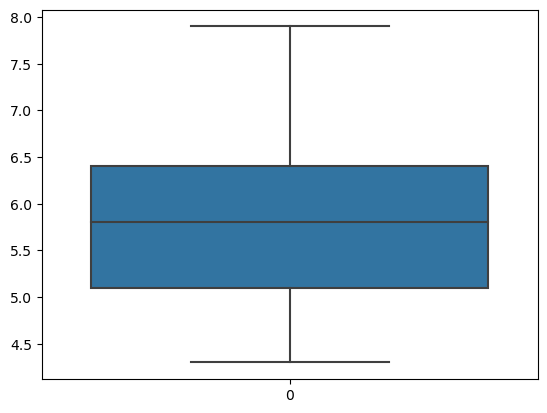

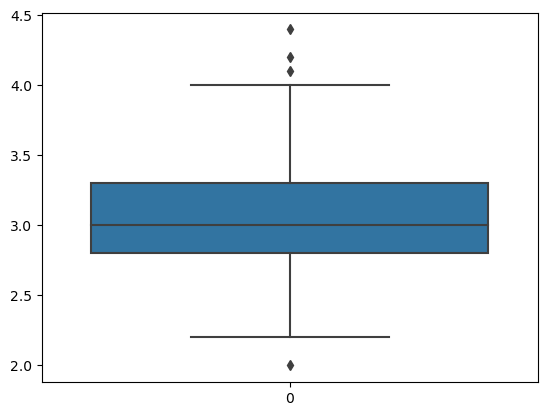

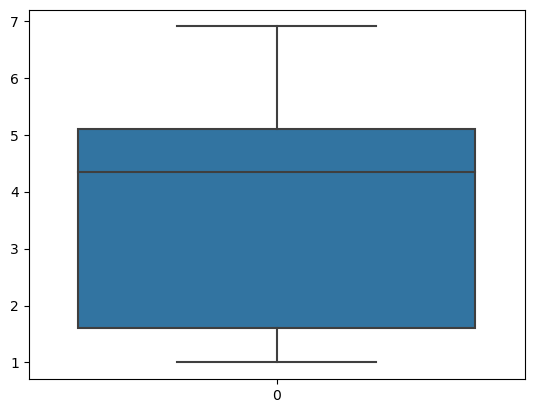

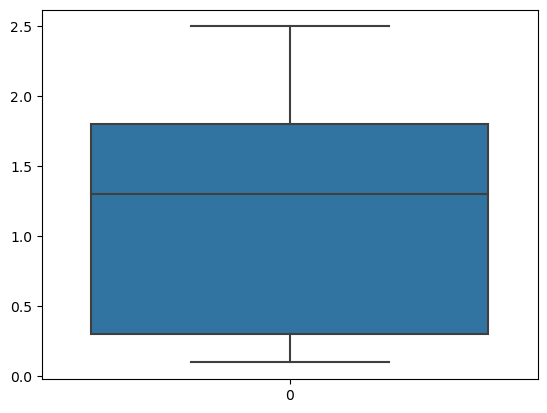

In [13]:
for cl in Data.columns:
    if Data[cl].dtype != 'object': 
        sns.boxplot(Data[cl])
        plt.show()

# Visualizing the histogram of each feature

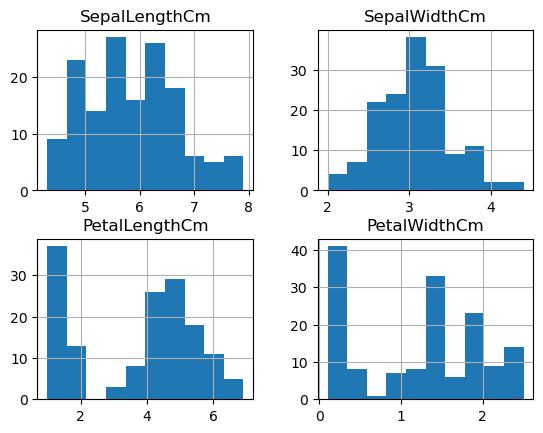

In [14]:
Data.hist()
plt.show()

# Understanding the correlation 

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


<Axes: >

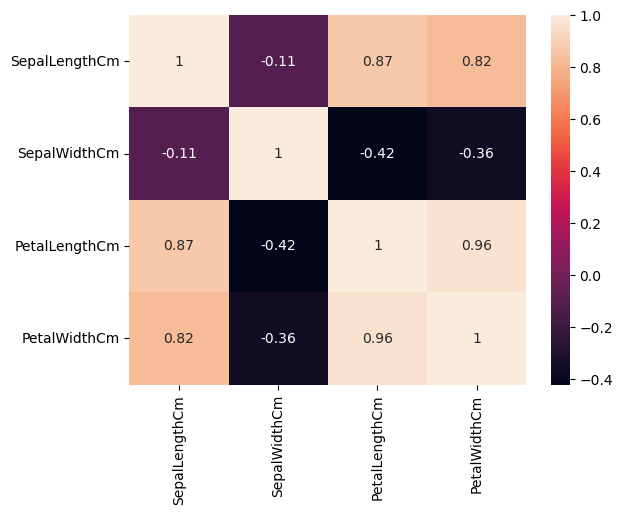

In [17]:
print(Data.corr())
sns.heatmap(Data.corr(), annot = True)

# Pairplot

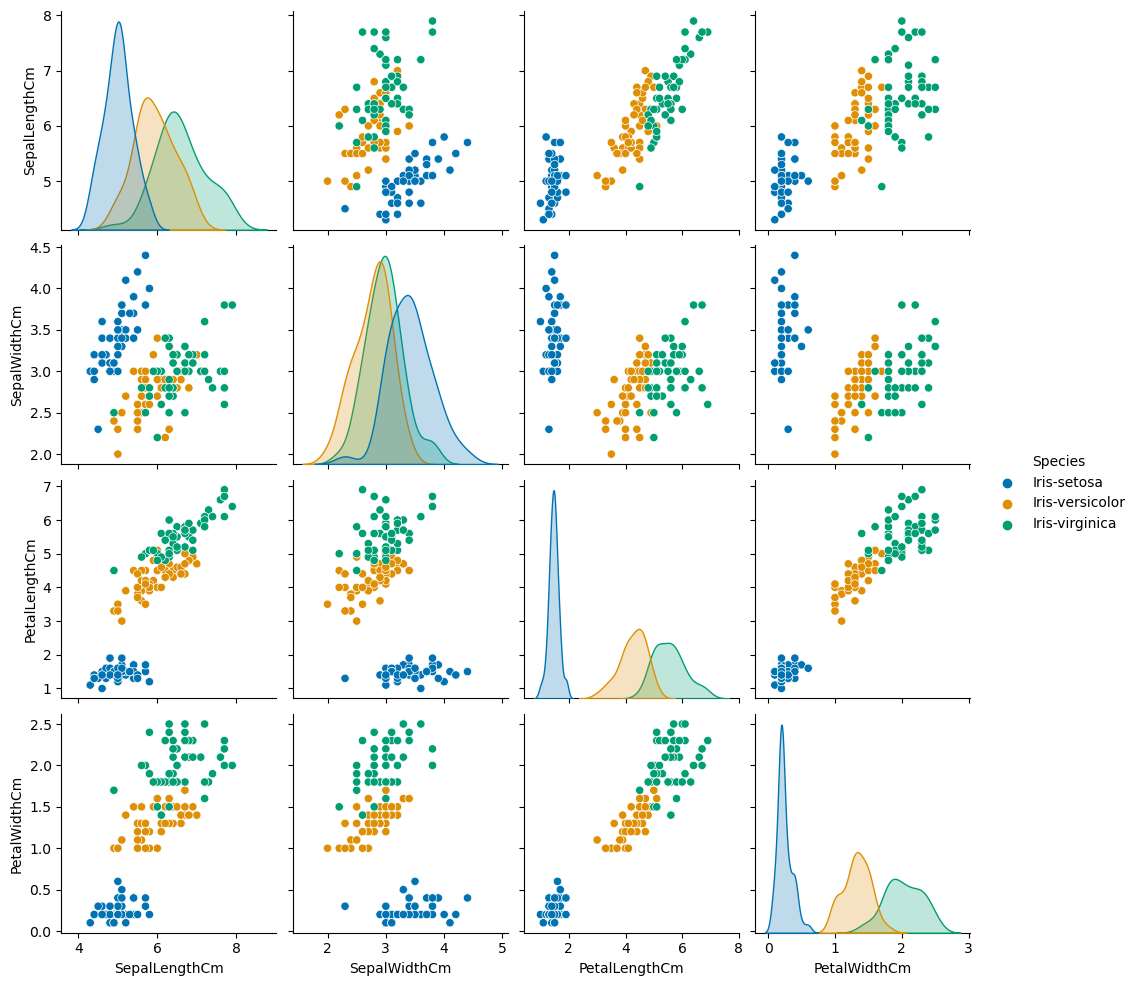

In [20]:
sns.pairplot(data=Data,hue="Species",palette="colorblind")

# Data Prepration

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pickle
state1 = 100
state2 = 150

X = Data.drop('Species', axis = 1)
Y = Data['Species']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=state1)

dtc = DecisionTreeClassifier(criterion = "entropy",random_state =state2)
model = dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)

pickle.dump(dtc, open('model.pkl','wb'))

# Visualizing the Decision Tree Classifier 

In [29]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)
z=clf_tree.fit(X_train, y_train )
print(z)

DecisionTreeClassifier(max_depth=4, max_features=2)


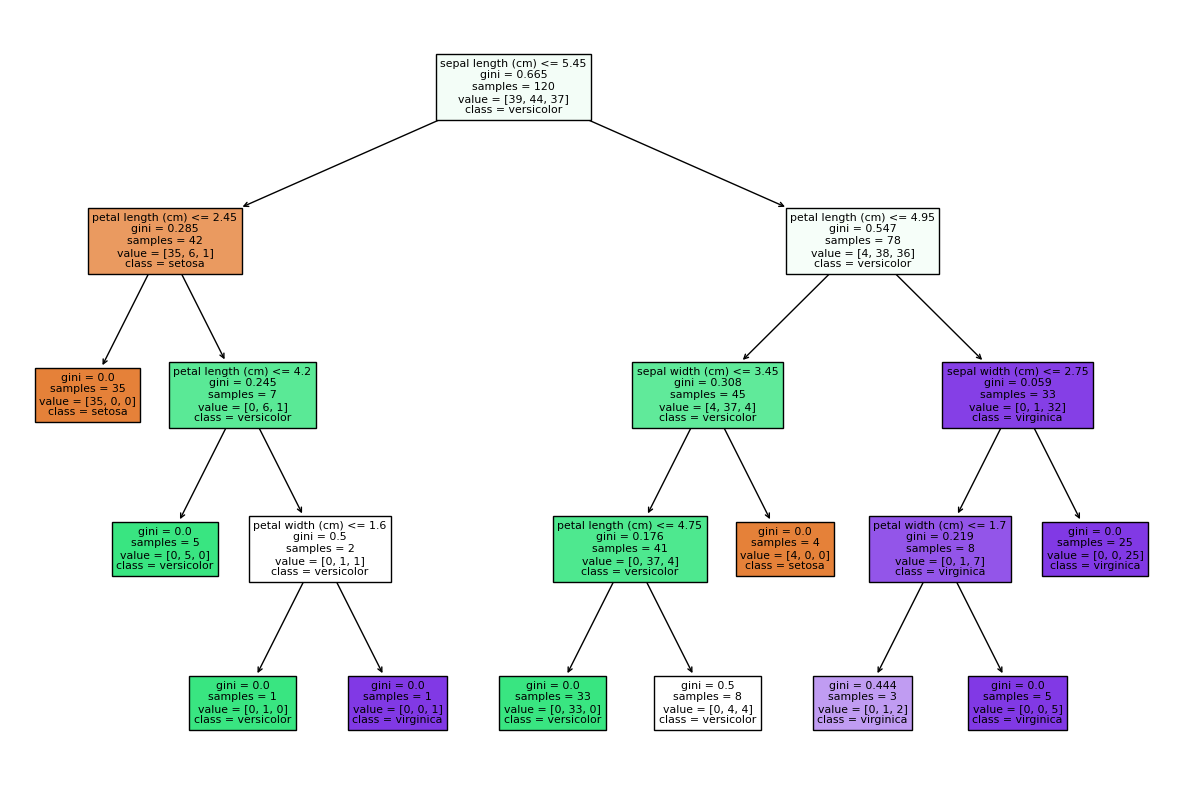

In [32]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=100)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



<Axes: >

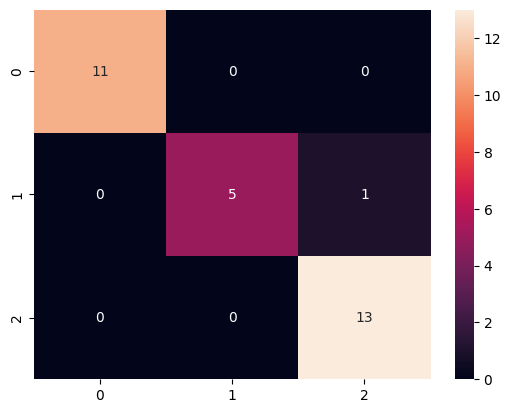

In [18]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict),annot = True)

In [20]:
accuracy_score(y_test, y_predict)

0.9666666666666667